<a href="https://colab.research.google.com/github/inschools-ng/MitsLinReg2/blob/main/Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assuming that the cost function is of form J(v)=v^2 the gradient would be 2*v. Note that v is a
single parameter not a vector.
a) Plot the cost function. Change the learning rate (learn_rate) within [0 1] range to analyze the
impact of the learning rate on the convergence to optimum solution obtained.
b) Replace the logistic regression gradient descent with a single independent variable instead of
2*v and run the gradient descent for a synthetic example.
Hint: use closed form gradient formula for logistic regression provided in slide 26 of Lecture
note DS1-4.pdf.

In [19]:
#from os import statvfs_result
import numpy as np
import matplotlib.pyplot as plt

# cost function returns v^2
def cost_function(v):
  return v**2

def gradient_descent(gradient, start, learn_rate, n_iter=50, tolerance=1e-06):
  vector = start
  cost_values = []

  for _ in range(n_iter):
    diff = -learn_rate * gradient(vector)
    if np.all(np.abs(diff) <= tolerance):
      break
    vector += diff
    cost_values.append(cost_function(vector))

  return vector, cost_values

gradient_descent(gradient=lambda v: 2*v, start=10.0, learn_rate=0.2)


(2.210739197207331e-06,
 [36.0,
  12.959999999999997,
  4.665599999999999,
  1.6796159999999996,
  0.6046617599999997,
  0.21767823359999988,
  0.07836416409599994,
  0.028211099074559976,
  0.010155995666841592,
  0.0036561584400629722,
  0.0013162170384226695,
  0.0004738381338321611,
  0.00017058172817957802,
  6.140942214464808e-05,
  2.2107391972073306e-05,
  7.95866110994639e-06,
  2.8651179995807004e-06,
  1.031442479849052e-06,
  3.713192927456587e-07,
  1.3367494538843713e-07,
  4.812298033983737e-08,
  1.732427292234145e-08,
  6.236738252042922e-09,
  2.2452257707354513e-09,
  8.082812774647625e-10,
  2.909812598873145e-10,
  1.0475325355943319e-10,
  3.7711171281395945e-11,
  1.3576021661302538e-11,
  4.887367798068914e-12])

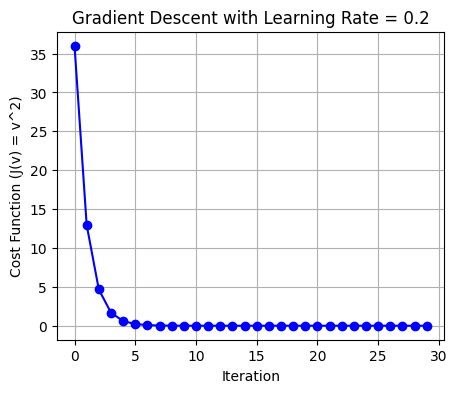

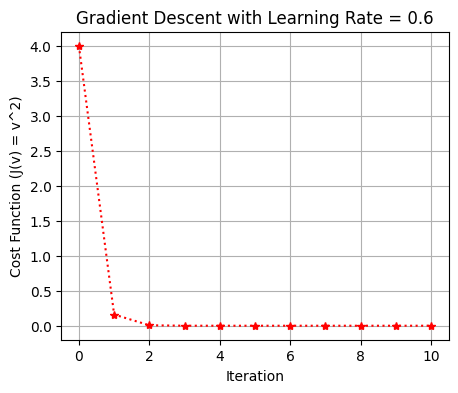

In [20]:

vector_values_1, cost_values_1 = gradient_descent(gradient=lambda v: 2*v, start=10.0, learn_rate=0.2)
vector_values_2, cost_values_2 = gradient_descent(gradient=lambda v: 2*v, start=10.0, learn_rate=0.6)

# plot the cost function
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(range(len(cost_values_1)), cost_values_1, marker='o', linestyle='-', color='b')
plt.xlabel('Iteration')
plt.ylabel('Cost Function (J(v) = v^2)')
plt.title(f'Gradient Descent with Learning Rate = {0.2}')
plt.grid(True)
plt.show()

plt.figure(figsize=(11,4))
plt.subplot(122)
plt.plot(range(len(cost_values_2)), cost_values_2, marker='*', linestyle='dotted', color='r')
plt.xlabel('Iteration')
plt.ylabel('Cost Function (J(v) = v^2)')
plt.title(f'Gradient Descent with Learning Rate = {0.6}')
plt.grid(True)
plt.show()


The impact of the learning rate on the convergence to optimum solution is shown in the differnce in the two plots:

In plot 2, the algorithm takes larger steps and covers more ground in the direction of the gradient.
Convergence is also faster which leads to fewer numbers of iterations/steps towards reaching the optimal solution.

In plot 1, more steps and iterations are taken to converge at the optimal point becuse, as observed, each step covers less ground.

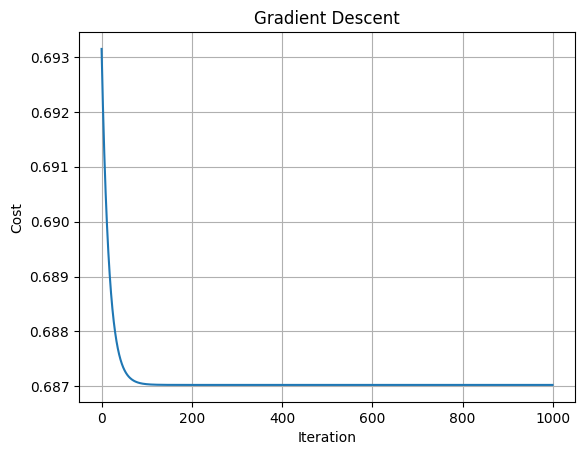

Coefficients (coef): [0.40193912]


In [93]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

np.random.seed(0)
X = np.random.rand(100, 1)
y = np.random.randint(0, 2, size=(100,))

def gradient_descent(X, y, learn_rate, n_iter=1000):
    m, n = X.shape
    coef = np.zeros(n)

    cost_values = []

    for _ in range(n_iter):
        z = np.dot(X, coef)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        coef -= learn_rate * gradient
        cost = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
        cost_values.append(cost)

    return coef, cost_values

coef_values, cost_values = gradient_descent(X, y, learn_rate=0.4)

# Plot the cost history to visualize convergence
plt.plot(range(len(cost_values)), cost_values)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.grid(True)
plt.show()

print("Coefficients (coef):", coef_values)